In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
sns.set(style="darkgrid")


import matplotlib.pyplot as plt 
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns


from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE
import umap

from sklearn.preprocessing import StandardScaler, normalize
from sklearn import metrics
from sklearn.metrics import silhouette_score

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

from sklearn import cluster 




C:\Users\ASUS\Anaconda3.3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning:

sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.



In [2]:
# DATA PREPARATION 
df = pd.read_csv('C:/creditcard.csv')
df.shape
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [4]:
df.describe() 

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [5]:
#Checking for NULL Values
df.isnull().sum().sort_values(ascending=False).head()  


MINIMUM_PAYMENTS       313
CREDIT_LIMIT             1
TENURE                   0
PURCHASES_FREQUENCY      0
BALANCE                  0
dtype: int64

In [6]:
##314 missing data were detected from 8950 data. This 3.5% does not require deleting the missing data.
#It is appropriate to write mean instead of missing data.

df.loc[(df['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS']=df['MINIMUM_PAYMENTS'].mean()
df.loc[(df['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT']=df['CREDIT_LIMIT'].mean()

In [7]:
df.drop(['CUST_ID'], axis=1, inplace=True)

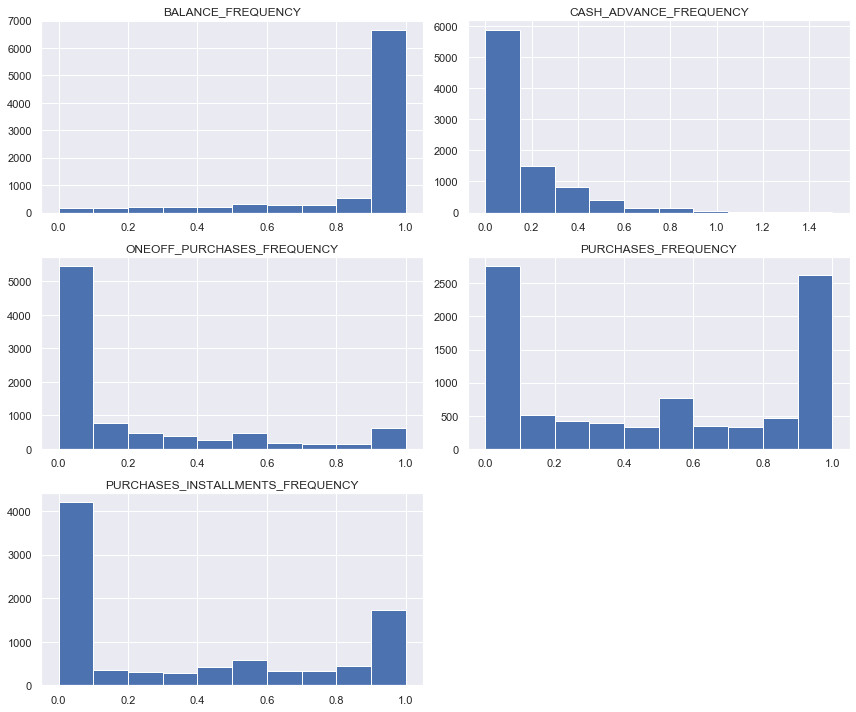

In [8]:
#A check on vriables

df[[                           
'BALANCE_FREQUENCY',                                                         
'PURCHASES_FREQUENCY',                 
'ONEOFF_PURCHASES_FREQUENCY',          
'PURCHASES_INSTALLMENTS_FREQUENCY' ,  
'CASH_ADVANCE_FREQUENCY' ]].hist(figsize=(12,10))
plt.tight_layout()

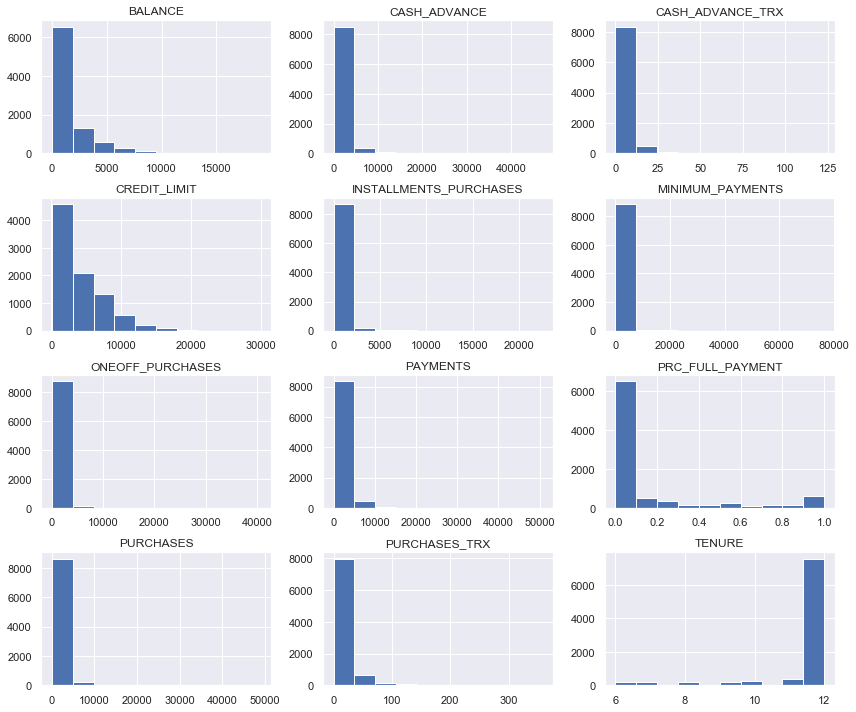

In [9]:
df[['BALANCE',                                               
'PURCHASES',                          
'ONEOFF_PURCHASES',                
'INSTALLMENTS_PURCHASES',          
'CASH_ADVANCE',                        
'CASH_ADVANCE_TRX',                    
'PURCHASES_TRX' ,                      
'CREDIT_LIMIT',                        
'PAYMENTS' ,                           
'MINIMUM_PAYMENTS',                 
'PRC_FULL_PAYMENT'  ,                  
'TENURE']].hist(figsize=(12,10))
plt.tight_layout()

In [10]:
#Overview about Outliers

cols = list(df)
irq_score = {}

for c in cols:
    q1 = df[c].quantile(0.25)
    q3 = df[c].quantile(0.75)
    score = q3 - q1
    outliers = df[(df[c] < q1 - 1.5 * score) | (df[c] > q3 + 1.5 * score)][c]
    values = df[(df[c] >= q1 - 1.5 * score) | (df[c] <= q3 + 1.5 * score)][c]
    
    irq_score[c] = {
        "Q1": q1,
        "Q3": q3,
        "IRQ": score,
        "n_outliers": outliers.count(),
        "outliers_avg": outliers.mean(),
        "outliers_stdev": outliers.std(),
        "outliers_median": outliers.median(),
        "values_avg:": values.mean(),
        "values_stdev": values.std(),
        "values_median": values.median(),
    }
    
irq_score = pd.DataFrame.from_dict(irq_score, orient='index')

irq_score

# IQR = Q3 − Q1
#Since deletion of outliers will cause data loss, for it will be clustered without deletion. Also, my aim is to define clusters within data rthym itself.

,Q1,Q3,IRQ,n_outliers,outliers_avg,outliers_stdev,outliers_median,values_avg:,values_stdev,values_median
BALANCE,128.281915,2054.140036,1925.858120,695,7183.206924,2193.426633,6533.312256,1564.474828,2081.531879,873.385231
BALANCE_FREQUENCY,0.888889,1.000000,0.111111,1493,0.396616,0.194740,0.454545,0.877271,0.236904,1.000000
PURCHASES,39.635000,1110.130000,1070.495000,808,5662.898193,4739.024603,4220.550000,1003.204834,2136.634782,361.280000
ONEOFF_PURCHASES,0.000000,577.405000,577.405000,1013,3546.976594,3678.788638,2475.930000,592.437371,1659.887917,38.000000
INSTALLMENTS_PURCHASES,0.000000,468.637500,468.637500,867,2364.116021,1857.838527,1800.000000,411.067645,904.338115,89.000000
CASH_ADVANCE,0.000000,1113.821139,1113.821139,1030,5446.979628,3470.164991,4325.290526,978.871112,2097.163877,0.000000
PURCHASES_FREQUENCY,0.083333,0.916667,0.833334,0,NaN,NaN,NaN,0.490351,0.401371,0.500000
ONEOFF_PURCHASES_FREQUENCY,0.000000,0.300000,0.300000,782,0.952398,0.065798,1.000000,0.202458,0.298336,0.083333
PURCHASES_INSTALLMENTS_FREQUENCY,0.000000,0.750000,0.750000,0,NaN,NaN,NaN,0.364437,0.397448,0.166667
CASH_ADVANCE_FREQUENCY,0.000000,0.222222,0.222222,525,0.710399,0.137328,0.666667,0.135144,0.200121,0.000000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

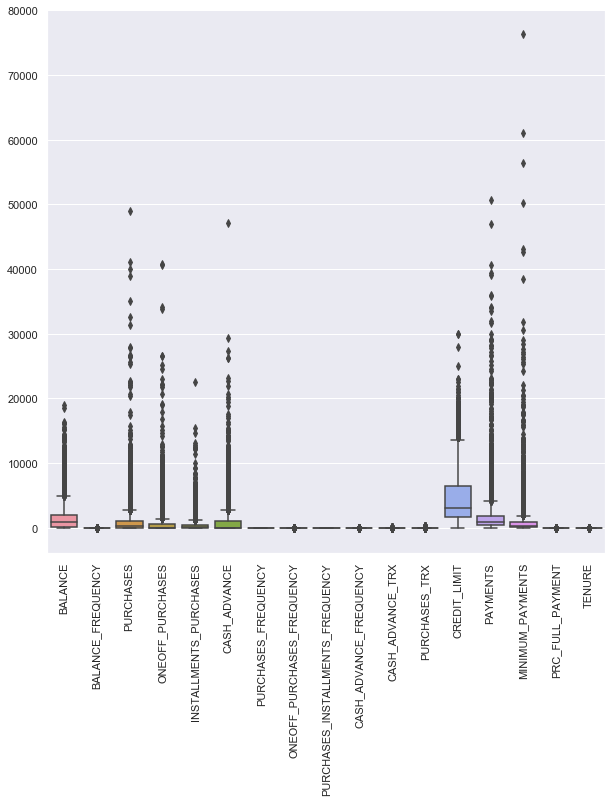

In [11]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df)
plt.xticks(rotation=90)


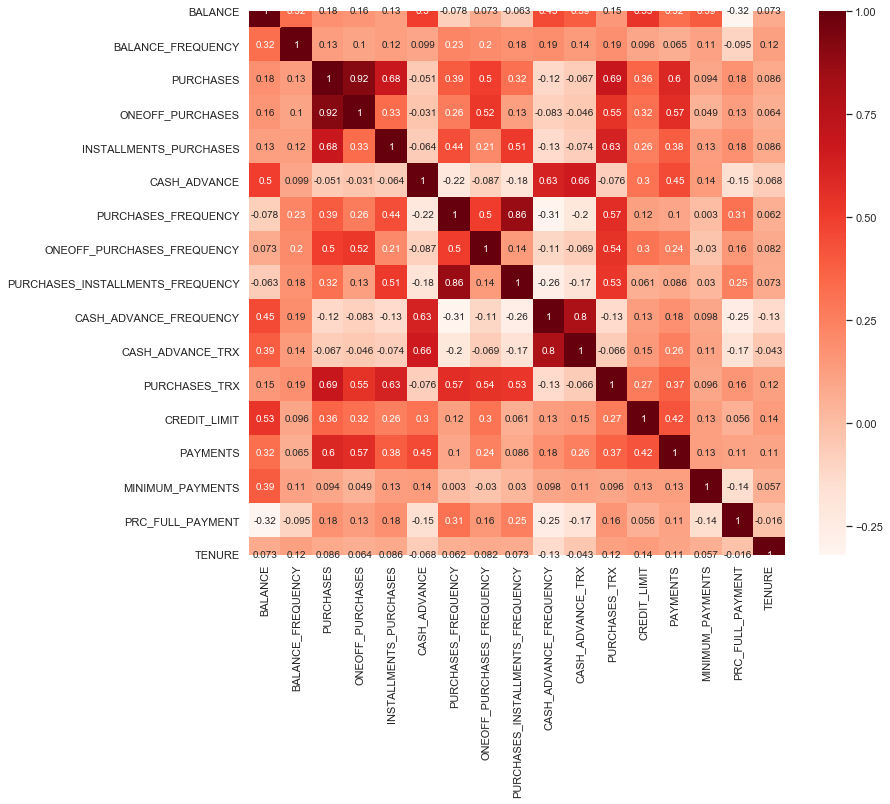

In [12]:
#We see the relationship between the correlation matrix and variables. As their proportion approaches 1
#We can say that they are in the right proportion with each other.

plt.figure(figsize=(12,10))
cor =df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()     

In [13]:
##standardization

from sklearn import preprocessing


# Get column names first
names = df.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
df_std = scaler.fit_transform(df)
df_std = pd.DataFrame(df_std, columns=names)
  


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

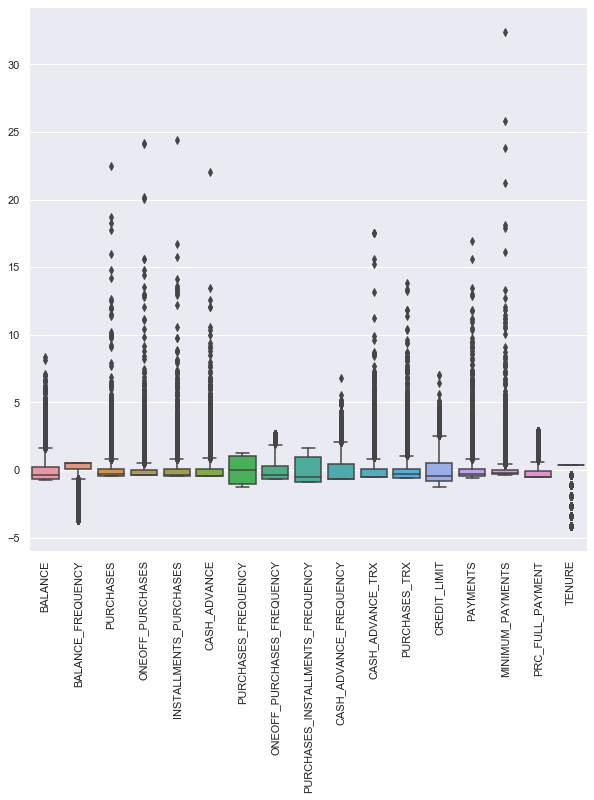

In [14]:
#In standardized data, z scores are written to variable values. As can be seen, the range of variables has decreased.

plt.figure(figsize=(10,10))
sns.boxplot(data=df_std)
plt.xticks(rotation=90)

In [15]:
#CLUSTERING MODELS
# 1.k-Means

n_clusters = 10

clustering = KMeans(n_clusters=n_clusters,
                    random_state=0
                   )

cluster_labels = clustering.fit_predict(df_std)



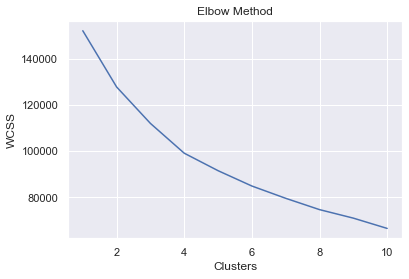

In [16]:
#Determining Number of Clusters with Elbow Method

#In this method, choosing 4 clusters seems to be correct.
wcss = []
cluster_list = range(1, 11)
for i in cluster_list :
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 40)
    kmeans.fit(df_std)
    wcss.append(kmeans.inertia_)
plt.plot(cluster_list, wcss)
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

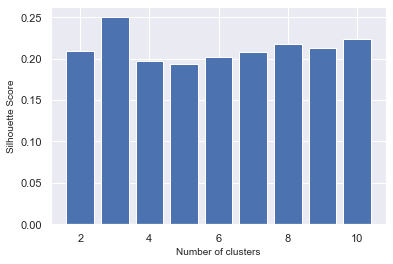

In [17]:
#Determining Number of Clusters with Silhouette Scores Method

#highest score in 3 clusters. However, around 6-7-8 clusters can also be applied.

#I checked the silhouette points to make a decision. Although the 3rd cluster model gave the highest score,I thought somewhere in the 6th, 7th and 8th clusters.""""


silhouette_scores = [] 

for n_cluster in range(2, 11):
    silhouette_scores.append( 
        silhouette_score(df_std, KMeans(n_clusters = n_cluster).fit_predict(df_std))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7,8,9,10] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()


In [18]:
#Kmeans with Different Number of Clusters from 2 to 20

kmeans_values=[]

for cluster in range(2,20):
    kmeans = KMeans(n_clusters=cluster, random_state=40).fit_predict(df_std)
    sil_score = metrics.silhouette_score(df_std,kmeans, metric='euclidean')
    print("Silhouette score for {} cluster k-means: {:.3f}".format(cluster,
                                                               metrics.silhouette_score(df_std, kmeans, metric='euclidean')))
    kmeans_values.append((cluster,sil_score))

Silhouette score for 2 cluster k-means: 0.210
Silhouette score for 3 cluster k-means: 0.250
Silhouette score for 4 cluster k-means: 0.198
Silhouette score for 5 cluster k-means: 0.193
Silhouette score for 6 cluster k-means: 0.203
Silhouette score for 7 cluster k-means: 0.215
Silhouette score for 8 cluster k-means: 0.222
Silhouette score for 9 cluster k-means: 0.213
Silhouette score for 10 cluster k-means: 0.220
Silhouette score for 11 cluster k-means: 0.217
Silhouette score for 12 cluster k-means: 0.216
Silhouette score for 13 cluster k-means: 0.219
Silhouette score for 14 cluster k-means: 0.199
Silhouette score for 15 cluster k-means: 0.221
Silhouette score for 16 cluster k-means: 0.206
Silhouette score for 17 cluster k-means: 0.200
Silhouette score for 18 cluster k-means: 0.203
Silhouette score for 19 cluster k-means: 0.207


In [19]:
#2.Hierarchical Clustering

siliuette_list_hierarchical = []

for cluster in range(2,20,2):
    for linkage_method in ['ward', 'average', 'complete']:
        agglomerative = AgglomerativeClustering(linkage=linkage_method, affinity='euclidean',n_clusters=cluster).fit_predict(df_std)
        sil_score = metrics.silhouette_score(df_std, agglomerative, metric='euclidean')
        siliuette_list_hierarchical.append((cluster, sil_score, linkage_method, len(set(agglomerative)) ) )
        
df_hierarchical = pd.DataFrame(siliuette_list_hierarchical, columns=['cluster', 'sil_score','linkage_method', 'number_of_clusters'])

In [20]:
df_hierarchical.sort_values('sil_score', ascending=False)



,cluster,sil_score,linkage_method,number_of_clusters
1,2,0.840813,average,2
4,4,0.808091,average,4
2,2,0.786555,complete,2
5,4,0.779261,complete,4
7,6,0.756536,average,6
10,8,0.709597,average,8
13,10,0.669882,average,10
16,12,0.668982,average,12
19,14,0.660499,average,14
8,6,0.659815,complete,6


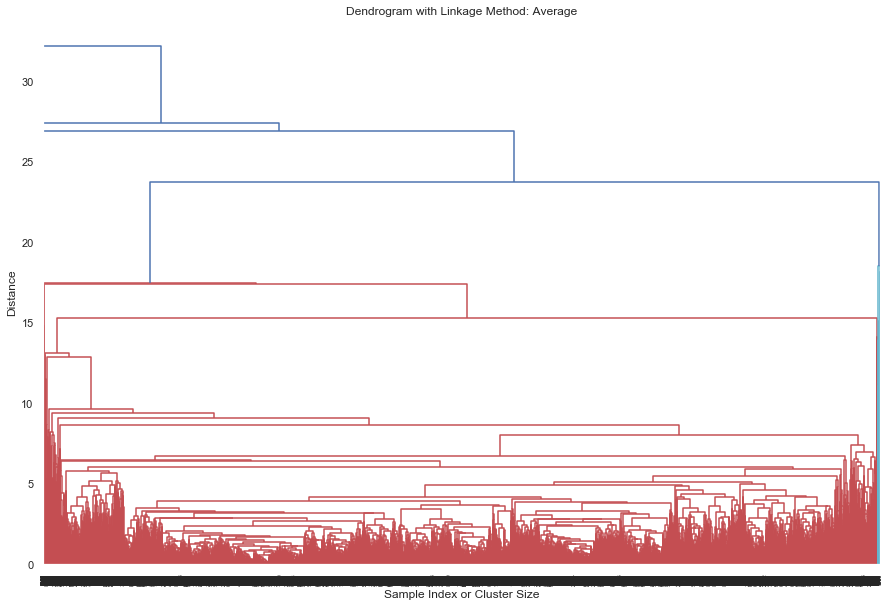

In [21]:
plt.figure(figsize=(15,10)) 
plt.title("Dendrogram with Linkage Method: Average") 
plt.xlabel('Sample Index or Cluster Size') 
plt.ylabel('Distance') 
          

dendrogram(linkage(df_std, method='average')) 
plt.show() 

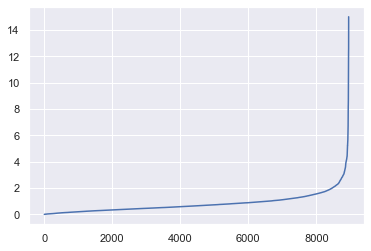

In [22]:
#3.DBSCAN

#Until around 8000th variable eps is under 2. density is too much in the general data set Here we can also see.

from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df_std)
distances, indices = nbrs.kneighbors(df_std)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [23]:
siliuette_list_dbscan = []

for eps in np.arange(0.1,2,0.2):
    for min_sample in range(1,10):
        dbscan = DBSCAN(eps=eps, min_samples= min_sample)
        dbscan.fit(df_std)
        sil_score = metrics.silhouette_score(df_std, dbscan.labels_, metric='euclidean')
        siliuette_list_dbscan.append((eps, min_sample, sil_score, len(set(dbscan.labels_))) )
        
df_dbscan = pd.DataFrame(siliuette_list_dbscan, columns=['eps', 'min_samples', 'sil_score', 'number_of_clusters'])

In [24]:
df_dbscan.sort_values('sil_score', ascending=False).head()

,eps,min_samples,sil_score,number_of_clusters
85,1.9,5,0.461593,2
86,1.9,6,0.455942,2
87,1.9,7,0.450568,2
88,1.9,8,0.447075,2
89,1.9,9,0.442959,2


In [25]:
siliuette_list_dbscan = []

for eps in np.arange(0.1,3,0.2):
    for min_sample in range(1,20,4):
        dbscan = DBSCAN(eps=eps, min_samples=min_sample)
        dbscan.fit(df_std)
        sil_score = metrics.silhouette_score(df_std, dbscan.labels_, metric='euclidean')
        siliuette_list_dbscan.append((eps, min_sample, sil_score, len(set(dbscan.labels_))) )
df_dbscan = pd.DataFrame(siliuette_list_dbscan, columns=['eps', 'min_samples', 'sil_score', 'number_of_clusters'])

In [26]:
df_dbscan.sort_values('sil_score', ascending=False).tail()

#Even though, checking the silhouette score to choose the best DBSCAN metric does not give the best model 
#for our data set. This method seems not a suitable one for our desired model even with a high silhouette score. 
#The reason behind this is that we have a high number of variables in the same cluster itself but distribution 
#of variables does not distributes homogenous in all clusters.


,eps,min_samples,sil_score,number_of_clusters
30,1.3,1,-0.399305,1536
7,0.3,9,-0.404209,15
6,0.3,5,-0.424475,42
16,0.7,5,-0.438837,29
11,0.5,5,-0.443701,39


In [27]:
#Compering Results for the Optimal Number of Cluster Model

kmeans_      = KMeans(n_clusters=8, random_state=40).fit_predict(df_std)

hierarchical_= AgglomerativeClustering(linkage='average', affinity='euclidean', n_clusters=8).fit_predict(df_std)

dbscan       = DBSCAN(eps=9.5, min_samples=1).fit_predict(df_std)

In [28]:
kmeansSilhouette_Score        = metrics.silhouette_score(df_std, kmeans_, metric='euclidean')
DBSCAN_Silhouette_Score       = metrics.silhouette_score(df_std, dbscan, metric='euclidean')
Hierarchical_Silhouette_Score = metrics.silhouette_score(df_std, hierarchical_, metric='euclidean')


In [29]:
Clustering_Silhouette_Scores  = [ ['KMeans',kmeansSilhouette_Score ],
                                ['Hierarchical',Hierarchical_Silhouette_Score ],
                                ['DBSCAN', DBSCAN_Silhouette_Score]]

Clustering_Silhouette_Scores  = pd.DataFrame(Clustering_Silhouette_Scores, columns=['Clustering Method', 'Silhouette Score']) 
Clustering_Silhouette_Scores.sort_values(by='Silhouette Score', ascending= False)

,Clustering Method,Silhouette Score
2,DBSCAN,0.751460
1,Hierarchical,0.709597
0,KMeans,0.221971


In [30]:

df['cluster'] = dbscan 
df['cluster'].value_counts()

0    8941
7       1
6       1
5       1
4       1
3       1
2       1
9       1
1       1
8       1
Name: cluster, dtype: int64

In [31]:
df['cluster'] = hierarchical_ 
df['cluster'].value_counts()

#Clearly, density is very much in the first cluster and lower number of variables in other clusters.
#However, checking cluster numbers and distribution of variables in each cluster shows that this method is not convenient for this data set.
#I continued with Kmeans. In the following sections, we can see the difference in two choices of kmeans models.

0    8916
2      18
3       5
4       4
1       4
7       1
6       1
5       1
Name: cluster, dtype: int64

In [32]:
kmeans_ = KMeans(n_clusters=8, random_state=40).fit(df_std)

df['cluster'] = kmeans_.labels_


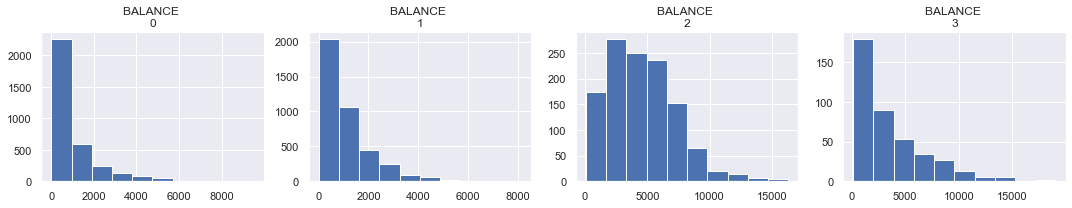

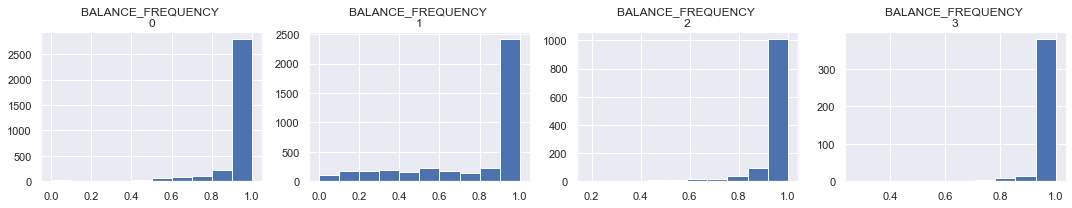

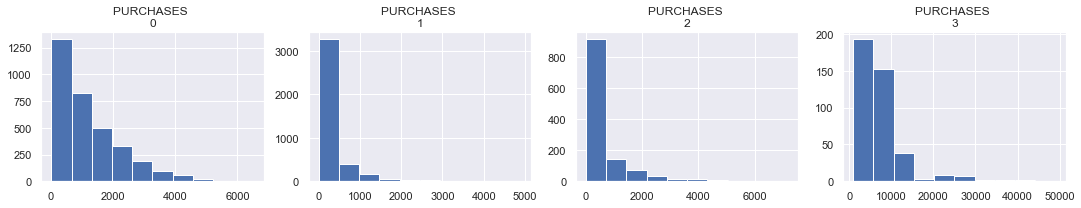

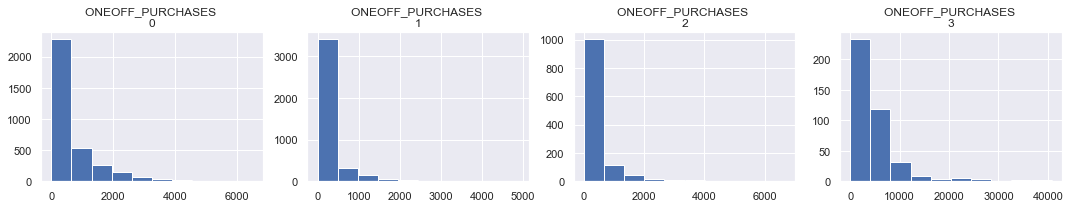

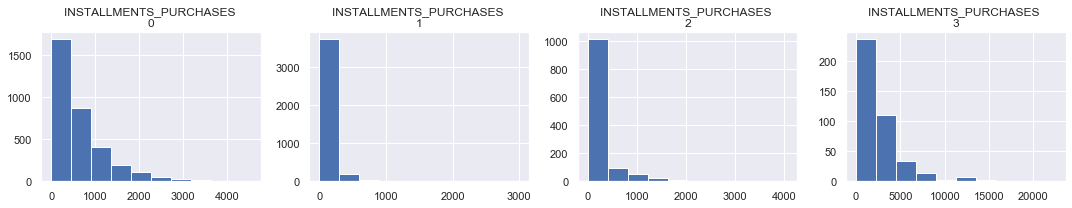

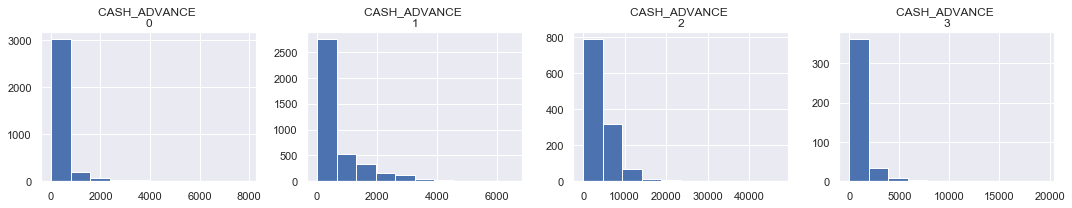

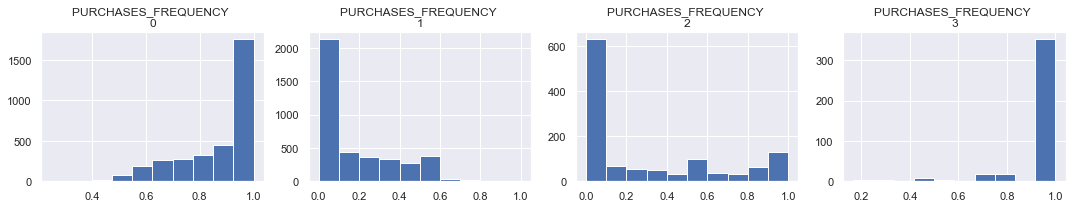

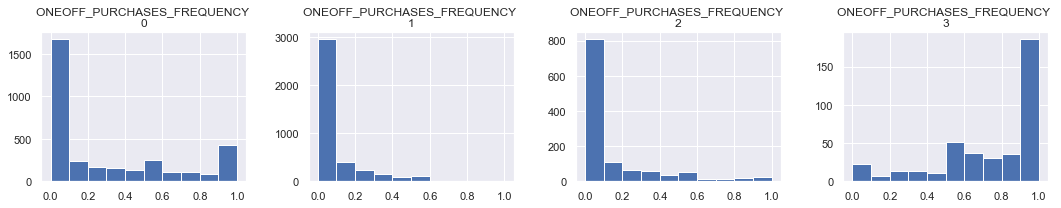

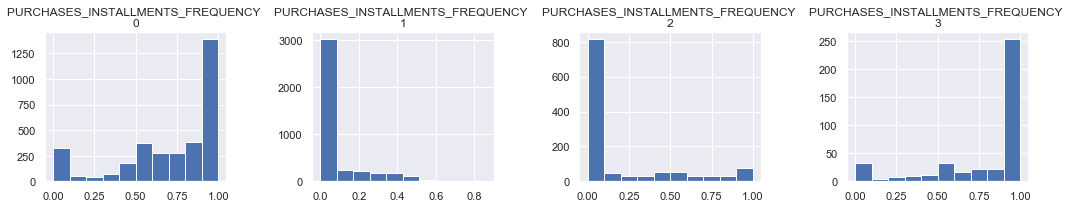

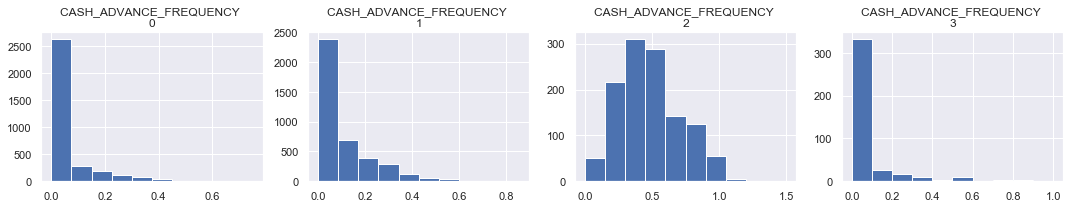

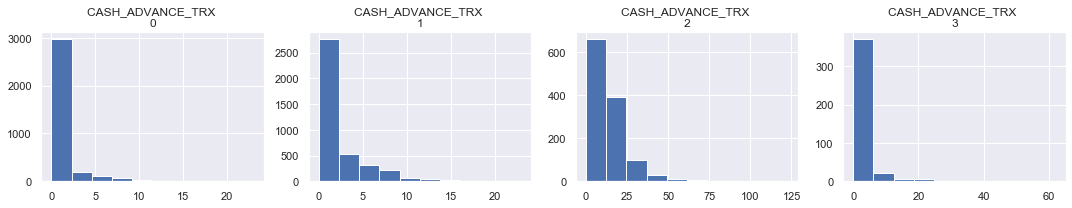

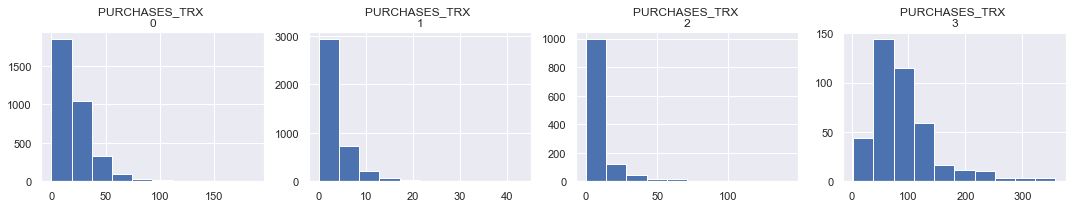

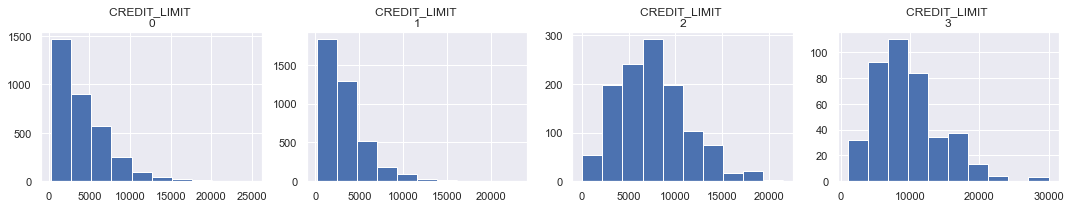

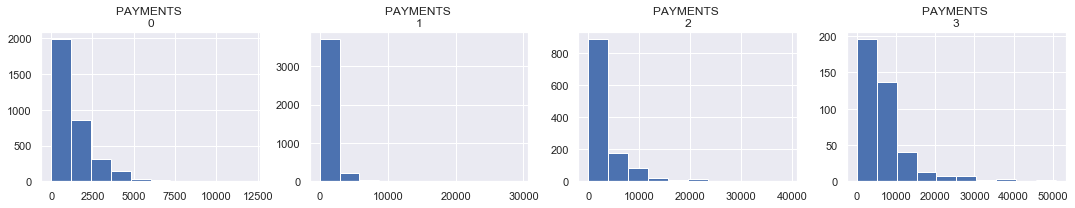

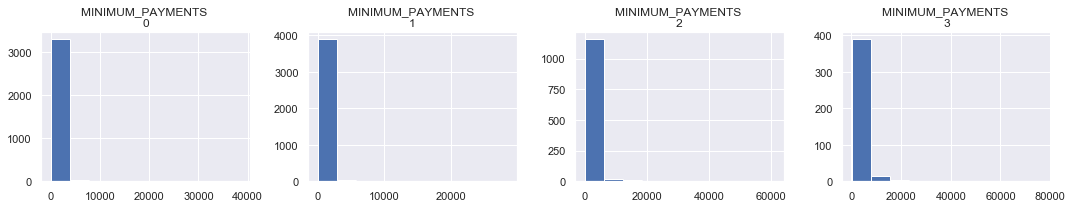

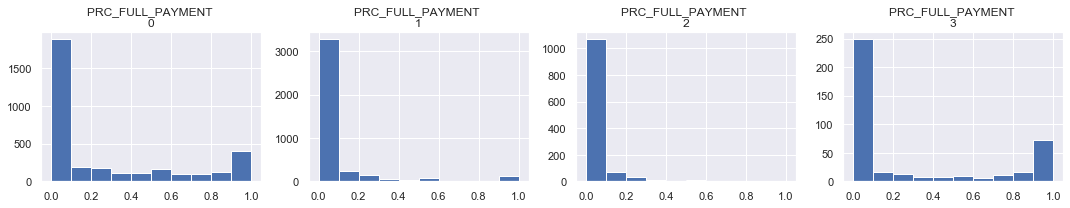

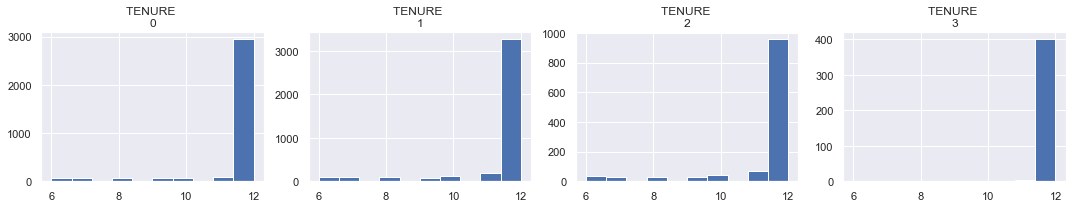

In [33]:
kmeans4_  = KMeans(n_clusters=4, random_state=40).fit(df_std)
df['cluster'] = kmeans4_.labels_
col_list= ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES','ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES','CASH_ADVANCE',
           'PURCHASES_FREQUENCY',  'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY' , 
           'CASH_ADVANCE_FREQUENCY' , 'CASH_ADVANCE_TRX',  'PURCHASES_TRX' , 'CREDIT_LIMIT','PAYMENTS' ,                           
           'MINIMUM_PAYMENTS','PRC_FULL_PAYMENT'  ,'TENURE' ] 


for column in col_list:
    plt.figure(figsize=(15,3))
    for i in range(0,4):
        plt.subplot(1,4,i+1)
        cluster = df[df['cluster']==i]
        cluster[column].hist()
        plt.title('{} \n{}'.format(column, i))
        
    plt.tight_layout()
    plt.show()

C:\Users\ASUS\Anaconda3.3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\ASUS\Anaconda3.3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning:

invalid value encountered in double_scalars



<Figure size 1800x1800 with 0 Axes>

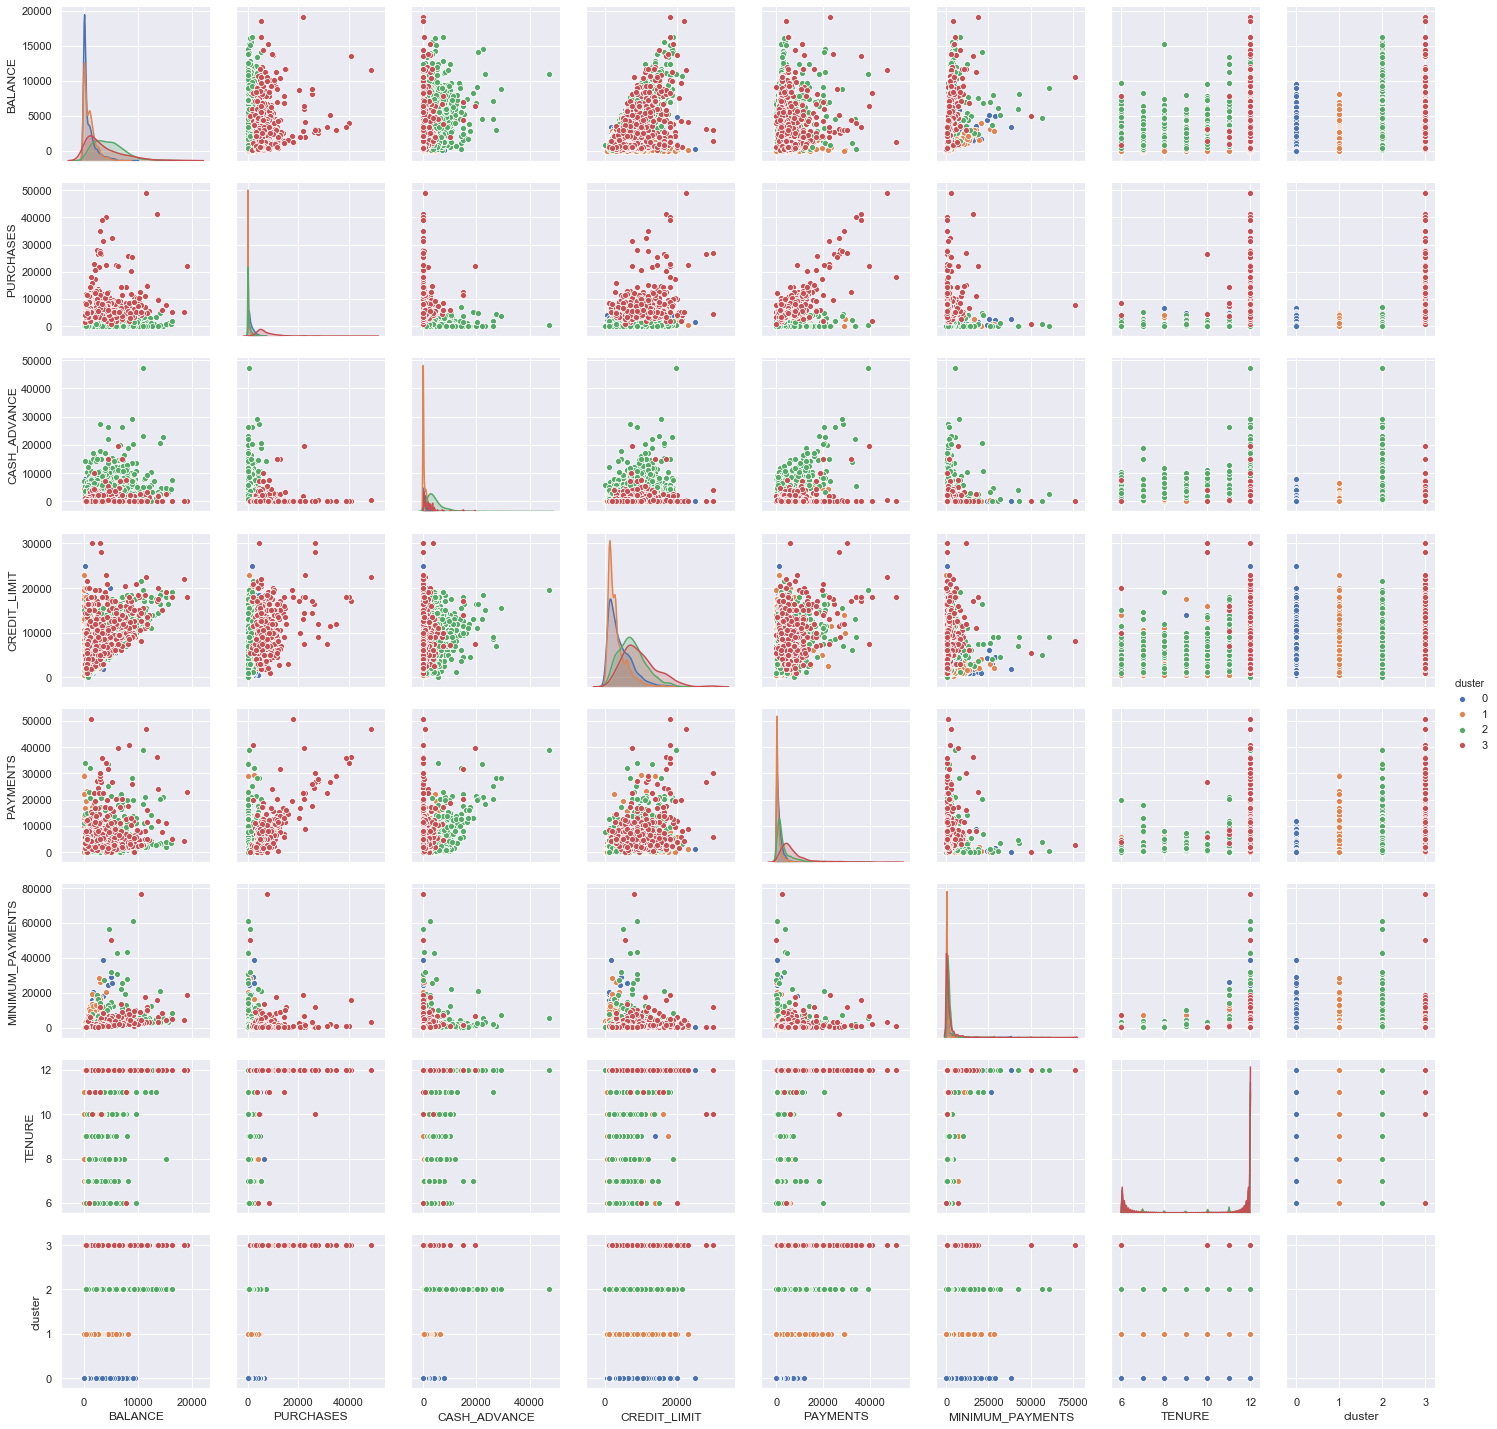

In [34]:
best_columns = ["BALANCE", "PURCHASES", "CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS", "TENURE"]

best_columns.append("cluster")
plt.figure(figsize=(25,25))
sns.pairplot( df[best_columns], hue="cluster")

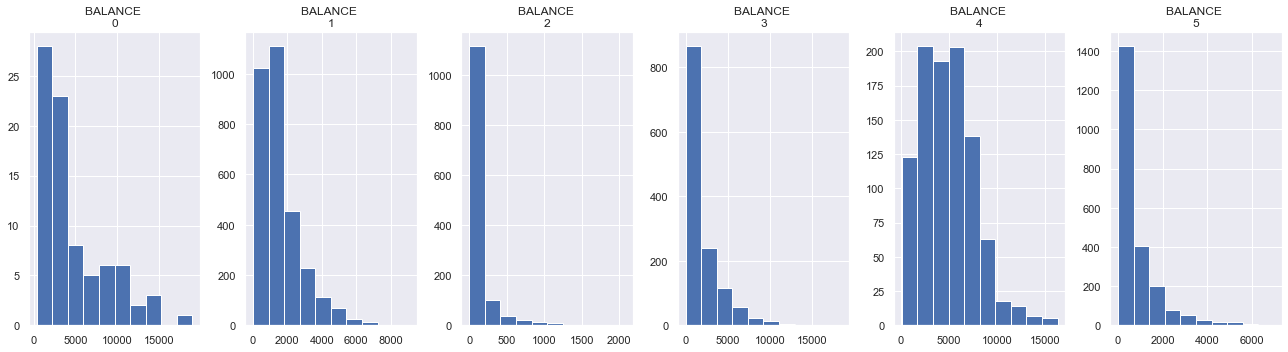

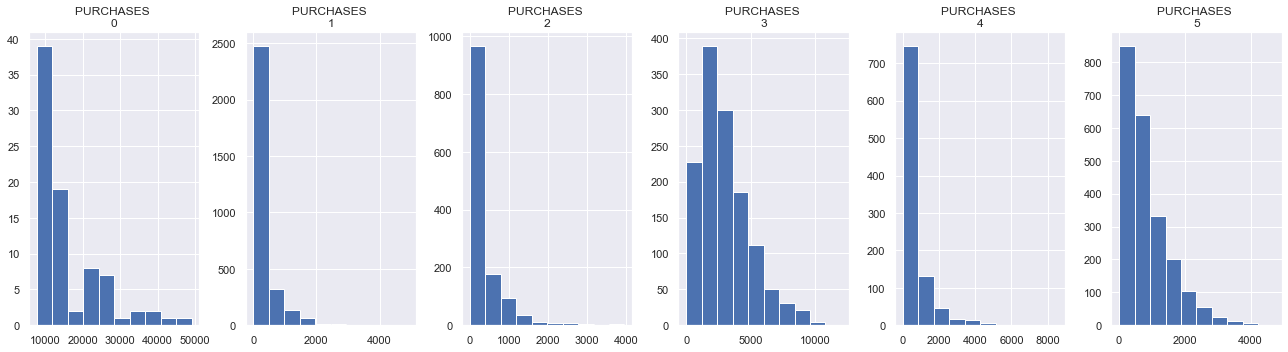

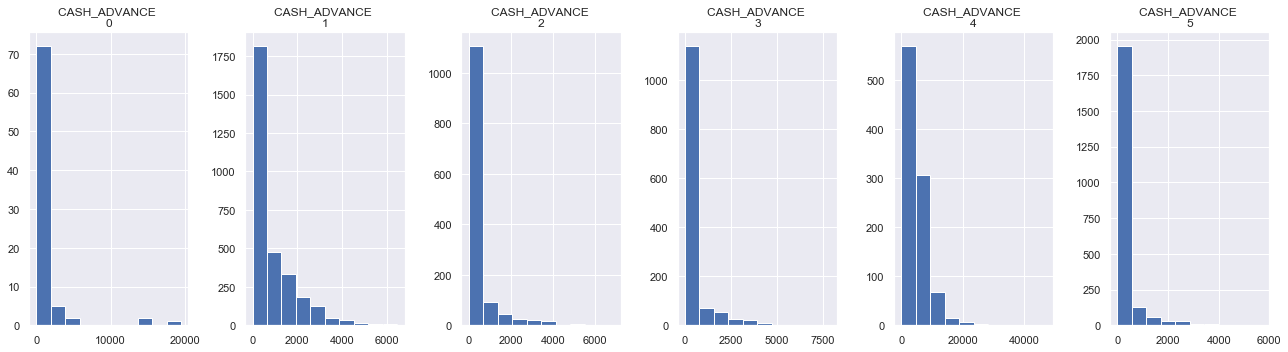

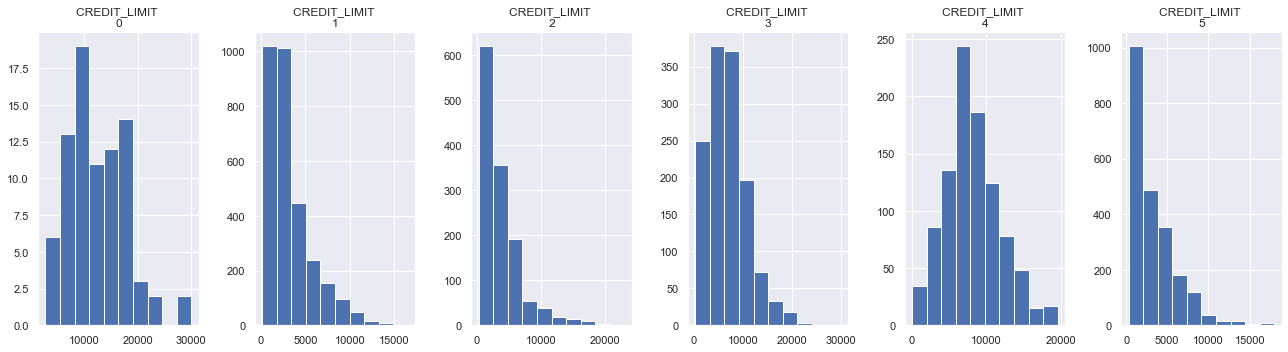

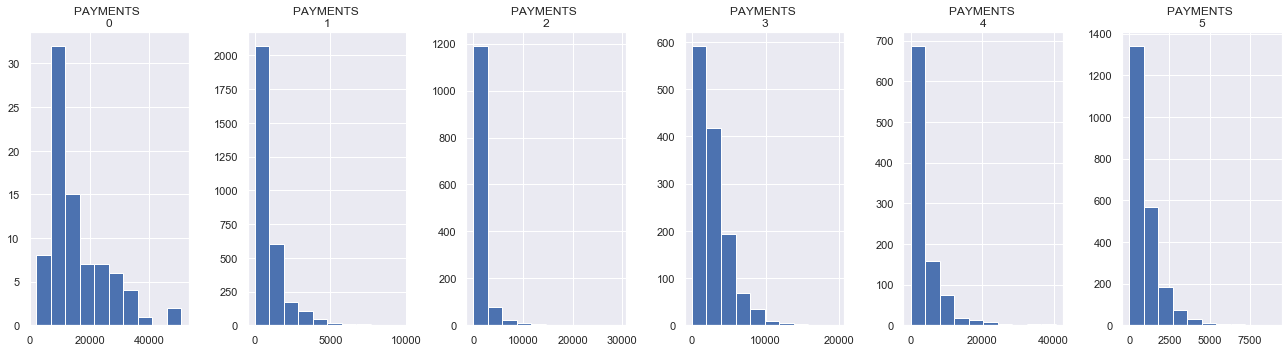

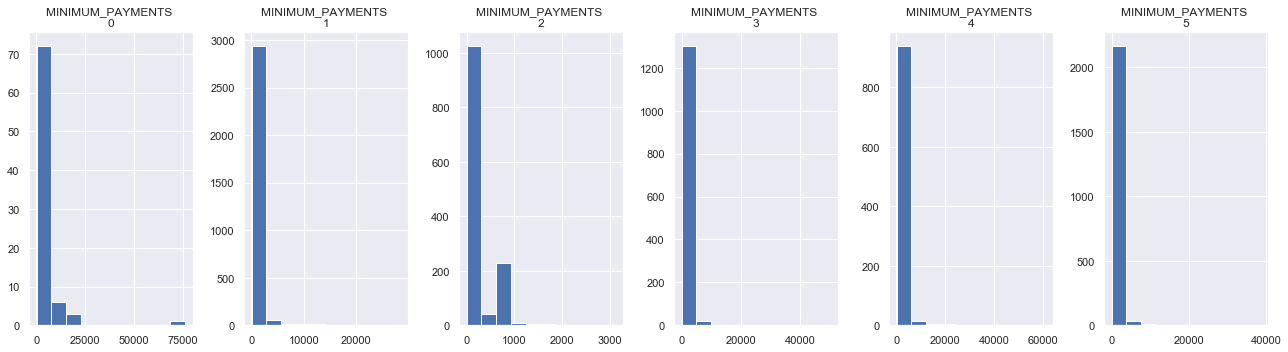

In [35]:
kmeans6_  = KMeans(n_clusters=6, random_state=40).fit(df_std)
df['cluster'] = kmeans6_.labels_
col_list= ["BALANCE", "PURCHASES", "CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS" ]                            

for column in col_list:
    plt.figure(figsize=(18,5))
    for i in range(0,6):
        plt.subplot(1,6,i+1)
        cluster = df[df['cluster']==i]
        cluster[column].hist()
        plt.title('{} \n{}'.format(column, i))
        
    plt.tight_layout()
    plt.show()

C:\Users\ASUS\Anaconda3.3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\ASUS\Anaconda3.3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning:

invalid value encountered in double_scalars



<Figure size 1800x1800 with 0 Axes>

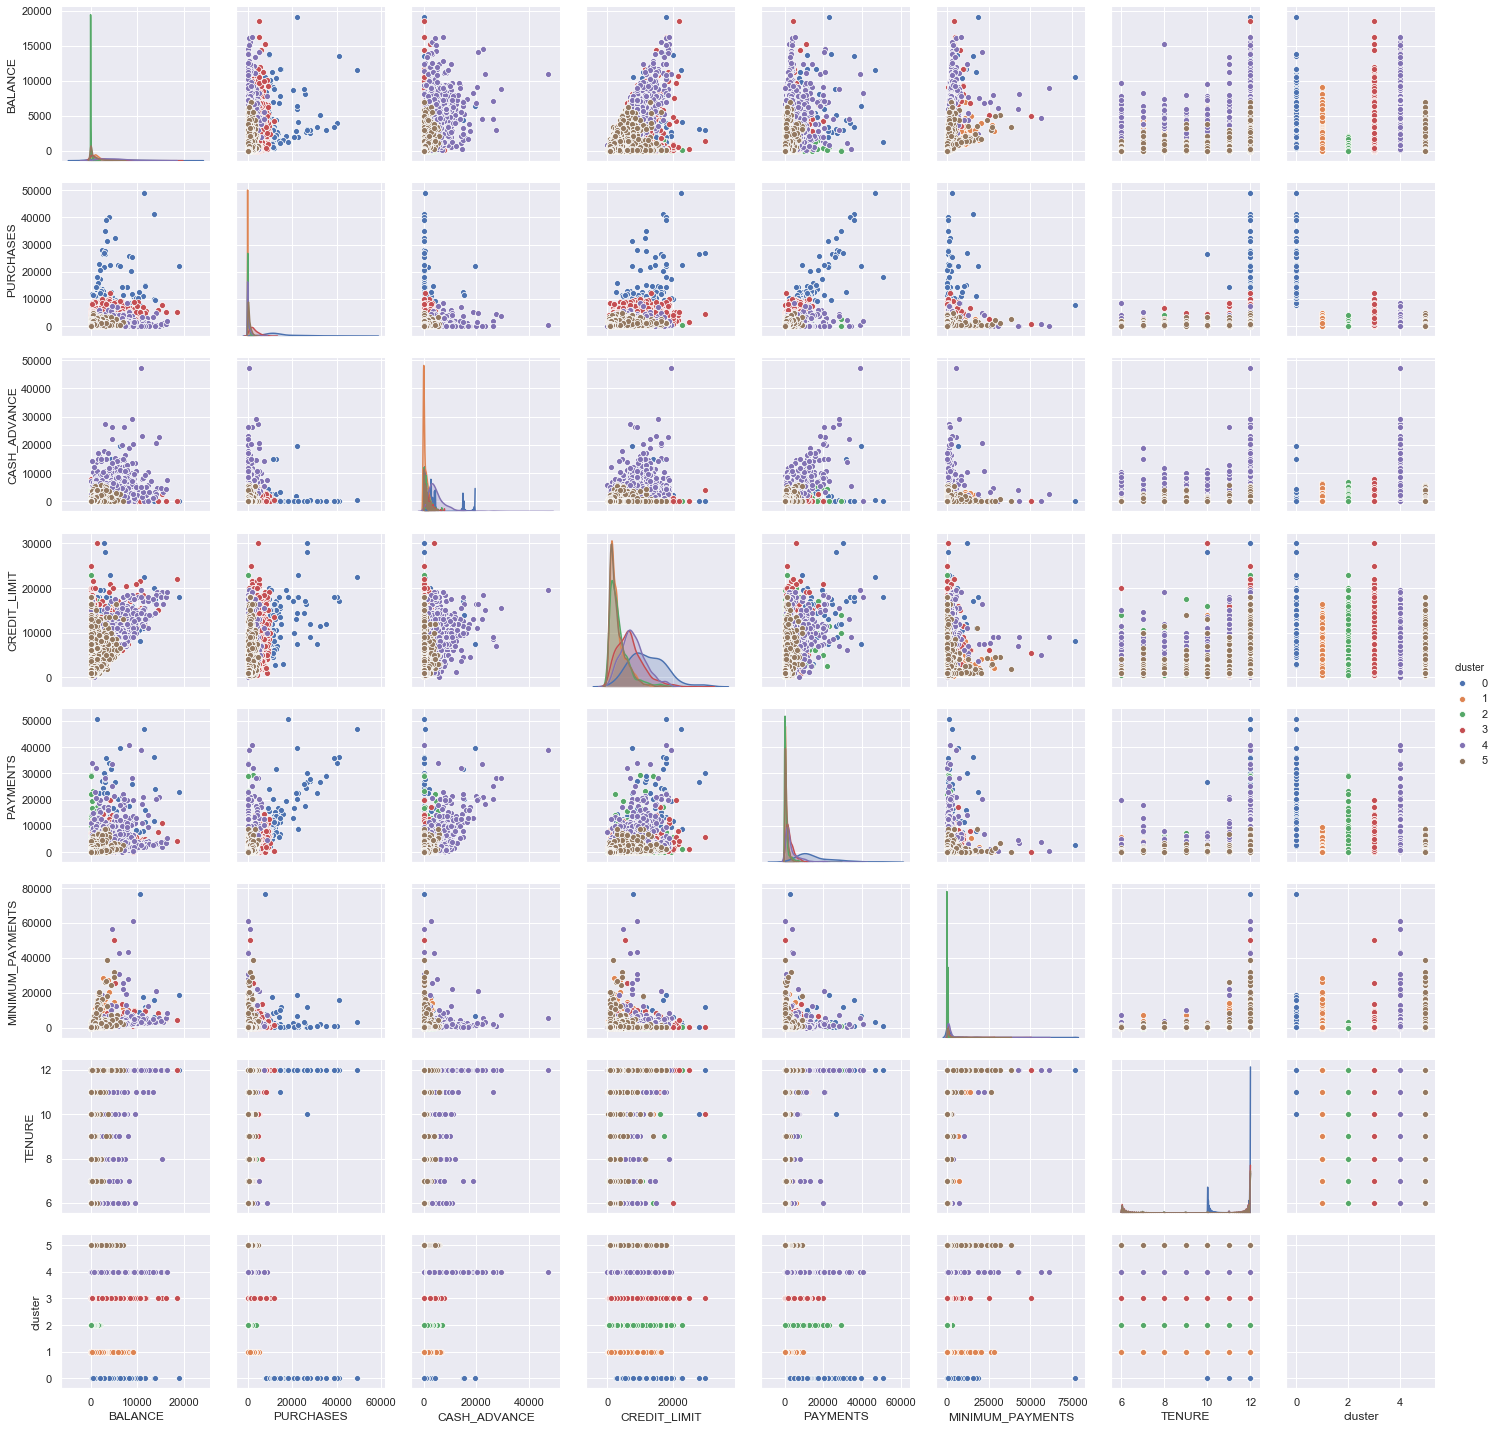

In [36]:
best_columns = ["BALANCE", "PURCHASES", "CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS", "TENURE"]

best_columns.append("cluster")
plt.figure(figsize=(25,25))
sns.pairplot( df[best_columns], hue="cluster")

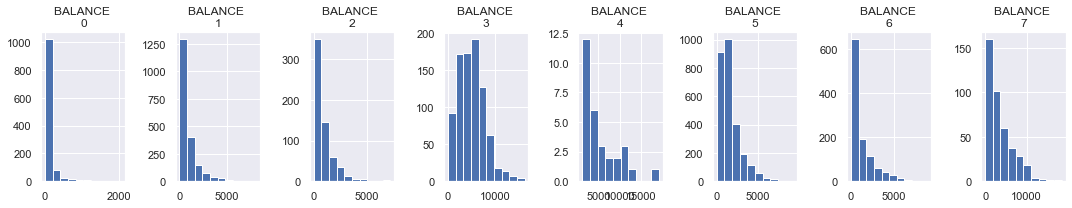

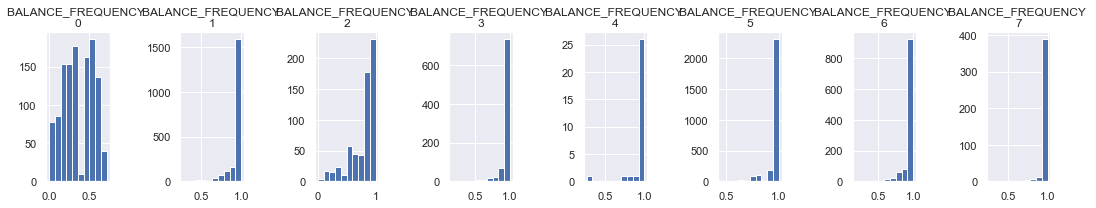

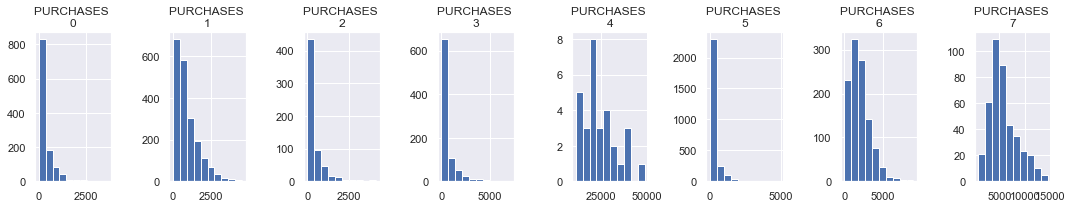

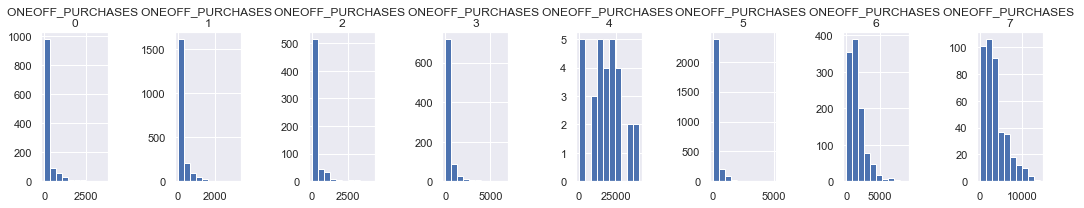

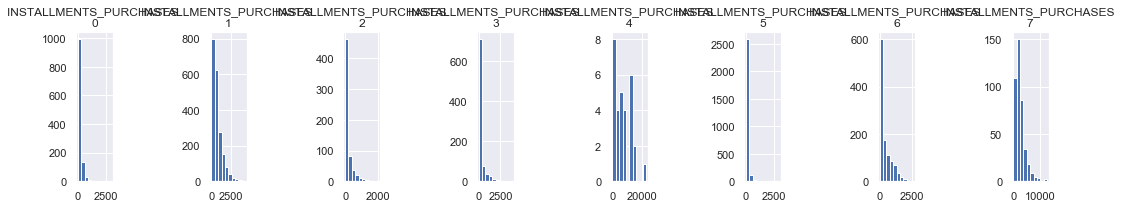

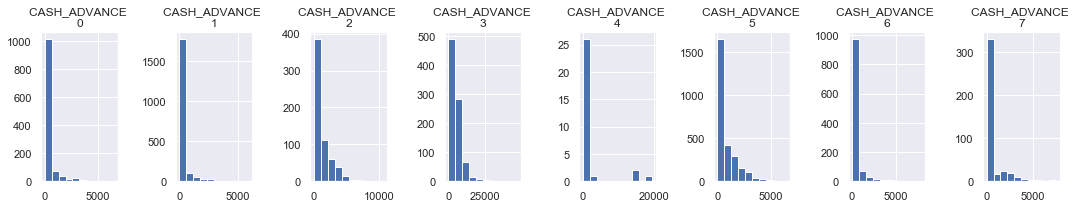

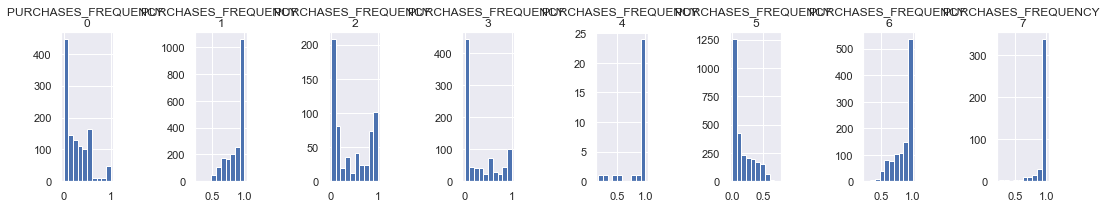

C:\Users\ASUS\Anaconda3.3\lib\site-packages\ipykernel_launcher.py:17: UserWarning:

Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations



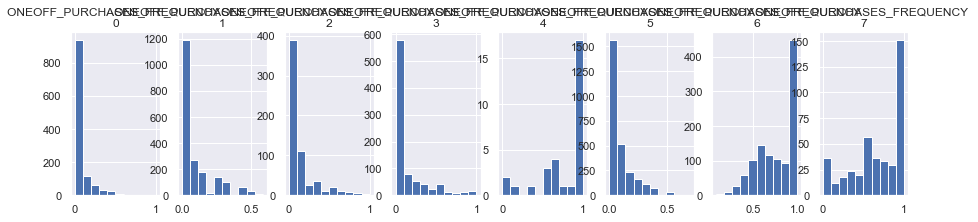

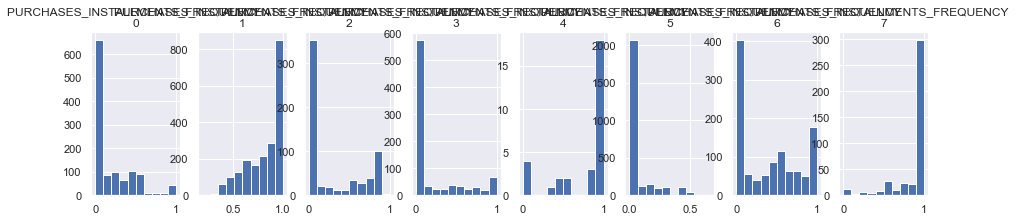

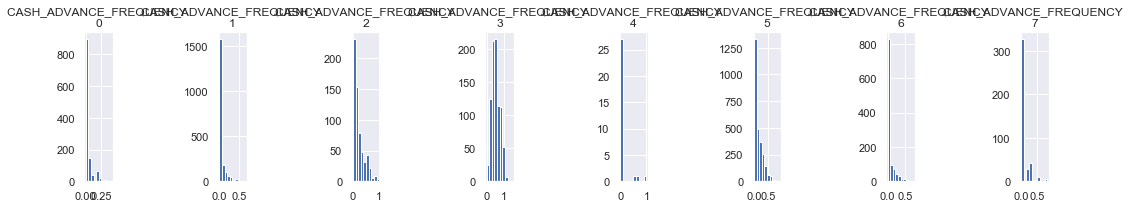

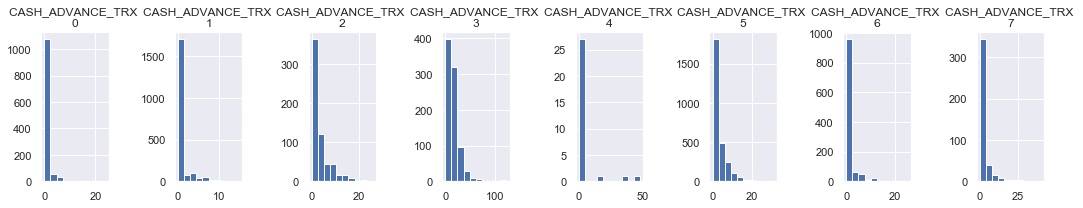

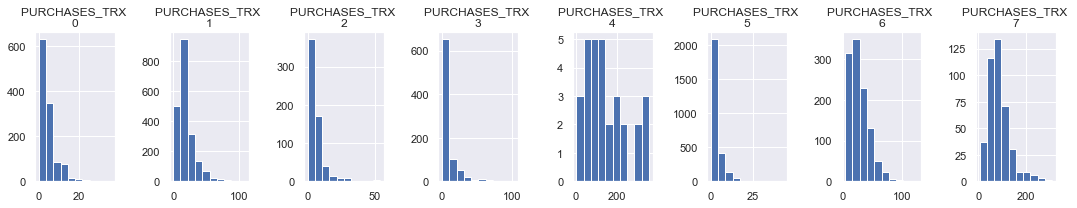

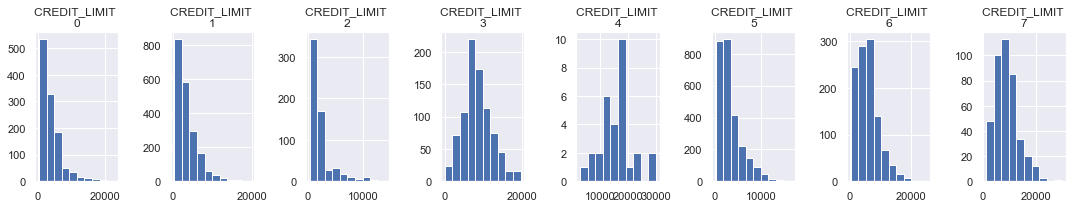

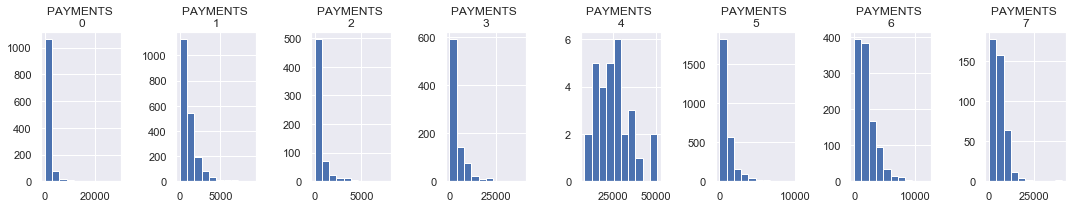

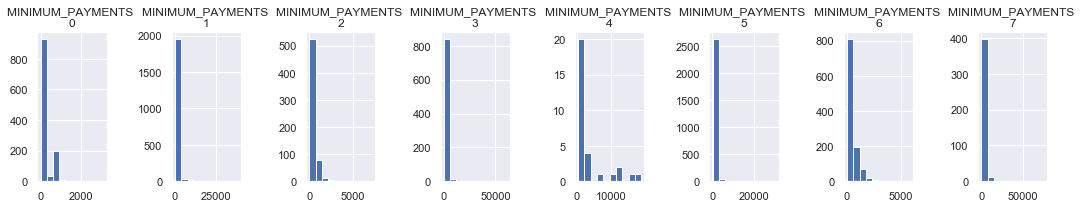

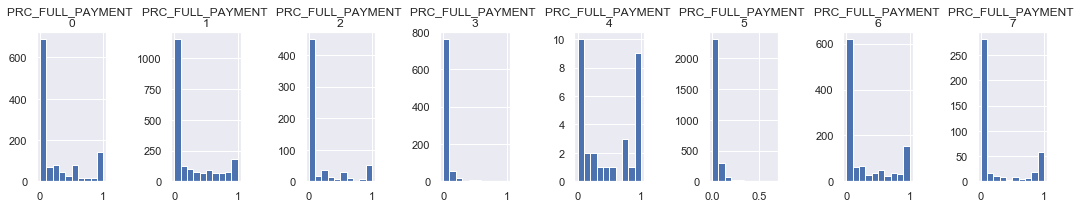

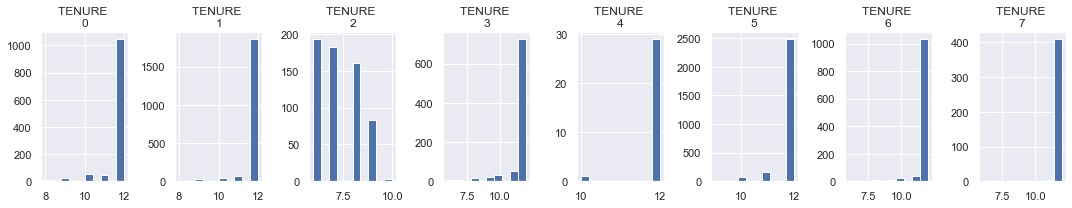

In [37]:
kmeans8_  = KMeans(n_clusters=8, random_state=40).fit(df_std)
df['cluster'] = kmeans8_.labels_
col_list= ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES','ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES','CASH_ADVANCE',
           'PURCHASES_FREQUENCY',  'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY' , 
           'CASH_ADVANCE_FREQUENCY' , 'CASH_ADVANCE_TRX',  'PURCHASES_TRX' , 'CREDIT_LIMIT','PAYMENTS' ,                           
           'MINIMUM_PAYMENTS','PRC_FULL_PAYMENT'  ,'TENURE' ] 


for column in col_list:
    plt.figure(figsize=(15,3))
    for i in range(0,8):
        plt.subplot(1,8,i+1)
        cluster = df[df['cluster']==i]
        cluster[column].hist()
        plt.title('{} \n{}'.format(column, i))
        
    plt.tight_layout()
    plt.show()

C:\Users\ASUS\Anaconda3.3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\ASUS\Anaconda3.3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning:

invalid value encountered in double_scalars



<Figure size 1800x1800 with 0 Axes>

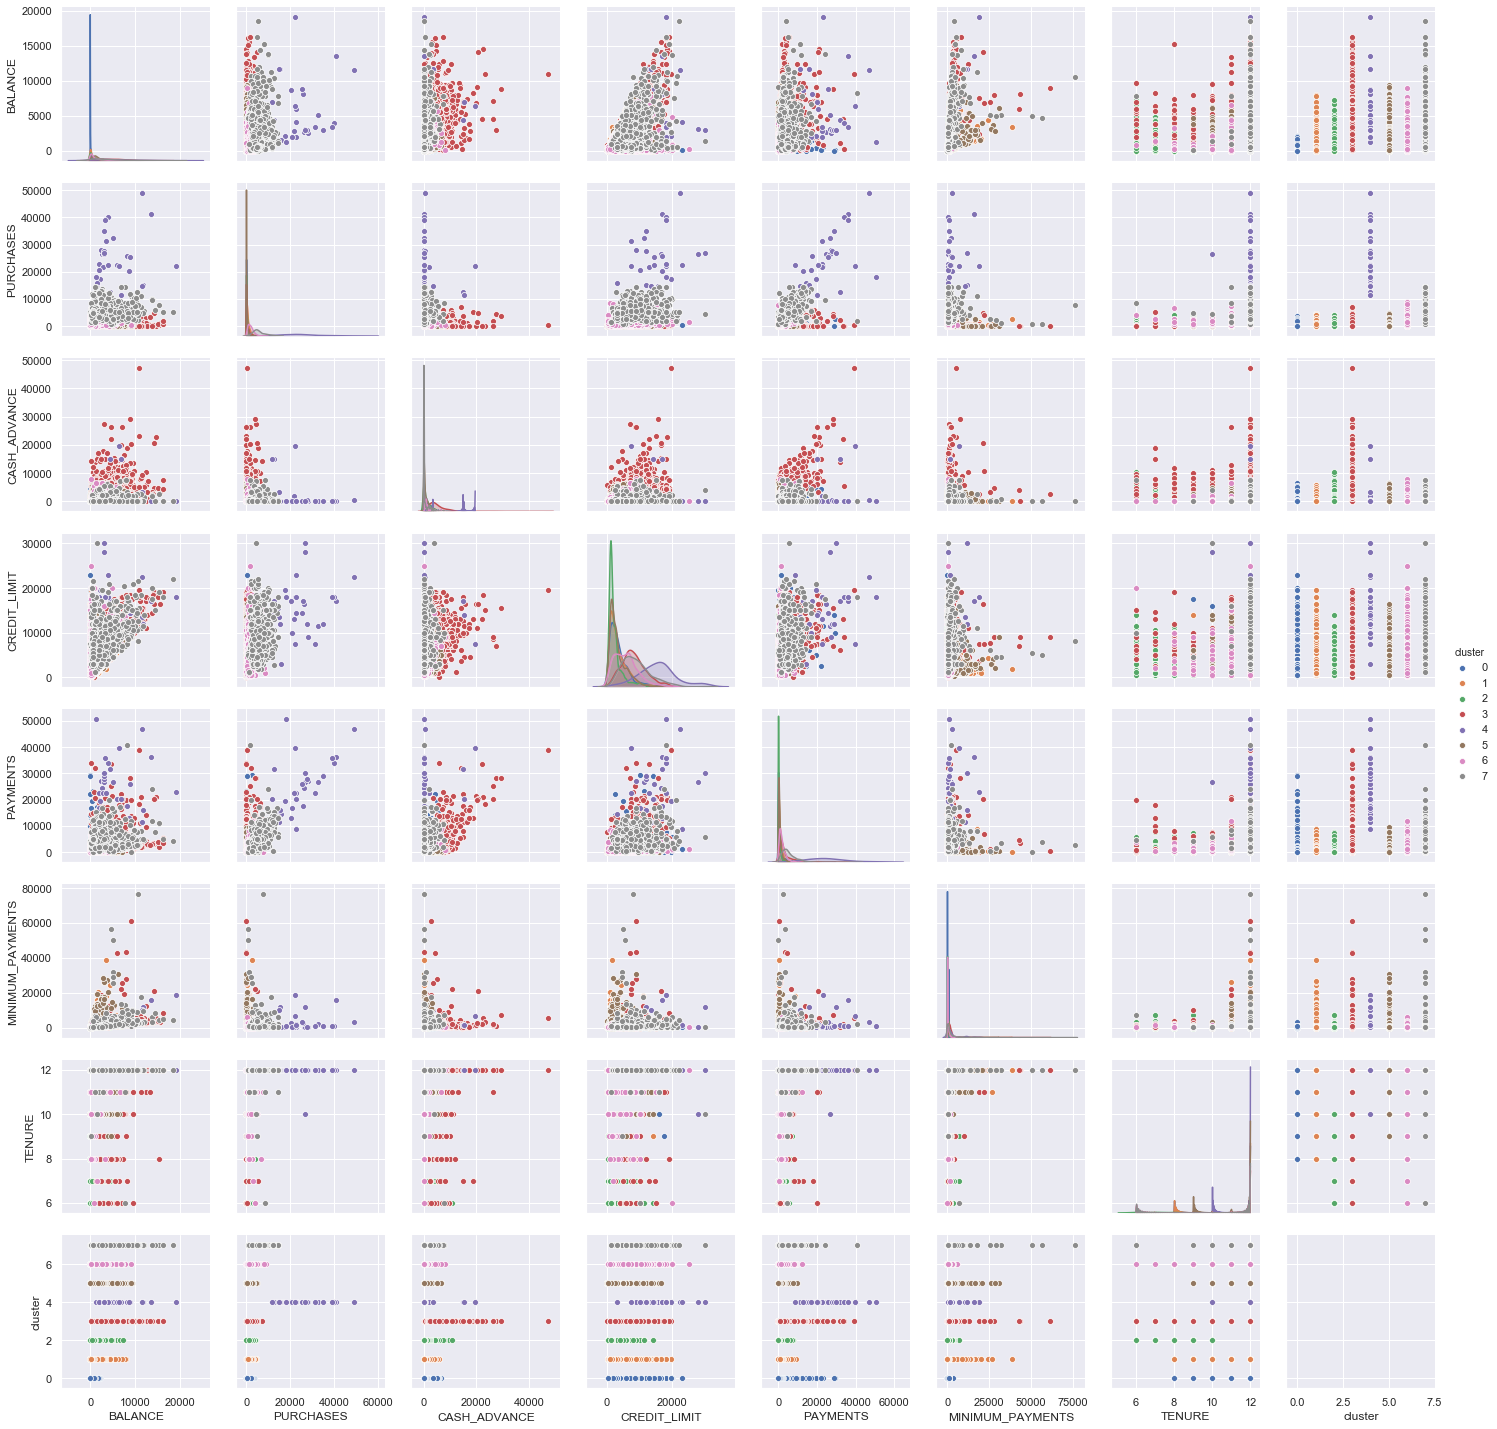

In [38]:
best_columns = ["BALANCE", "PURCHASES", "CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS", "TENURE"]

best_columns.append("cluster")
plt.figure(figsize=(25,25))
sns.pairplot( df[best_columns], hue="cluster")


In [39]:
# PCA 2 dimensions 

pca = PCA(n_components=2).fit(df_std)

df_pca2 = pca.fit_transform(df_std)
print("original shape:   ", df_std.shape)
print("transformed shape:", df_pca2.shape)

original shape:    (8950, 17)
transformed shape: (8950, 2)


In [40]:
#Result in a DataFrame

df_pca = pd.DataFrame(df_pca2) 
df_pca.columns = ['A1', 'A2']
df_pca.head()

,A1,A2
0,-1.682220,-1.076441
1,-1.138290,2.506528
2,0.969680,-0.383564
3,-0.873627,0.043168
4,-1.599433,-0.688571


In [41]:
print(pca.explained_variance_)

[4.63982474 3.45172419]


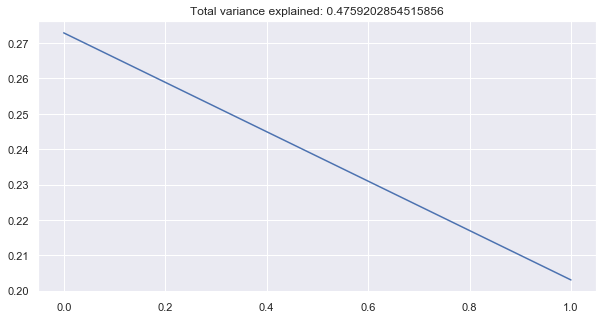

In [44]:
plt.figure(figsize = (10,5))
plt.plot(pca.explained_variance_ratio_)
plt.title('Total variance explained: {}'.format(pca.explained_variance_ratio_.sum()))
plt.show()

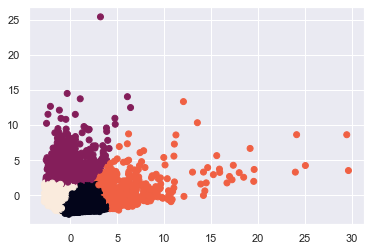

In [45]:
plt.scatter(df_pca['A1'], df_pca['A2'],
            c= KMeans(n_clusters=4, random_state=40).fit_predict(df_pca2), cmap =None) 
plt.show()

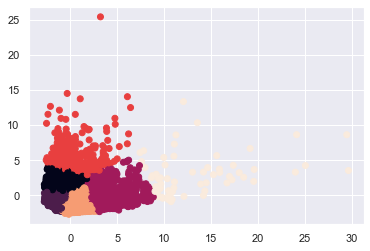

In [46]:
plt.scatter(df_pca['A1'], df_pca['A2'],
            c= KMeans(n_clusters=6, random_state=40).fit_predict(df_pca2), cmap =None) 
plt.show()

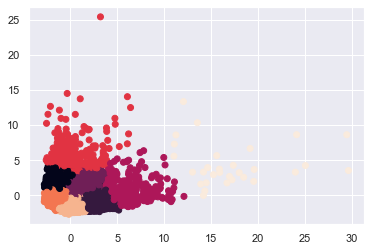

In [47]:
plt.scatter(df_pca['A1'], df_pca['A2'],
            c = KMeans(n_clusters=8, random_state=40).fit_predict(df_pca2), cmap =None) 
plt.show()

#it is obvious that when there are 8 sets, the sets in the data are more discrete and meaningful.So I decided to continue with 8 sets.

In [48]:
df.head(20)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,5
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,6
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,5
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,5
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,1
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12,7
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12,1
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12,5
9,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12,0


Text(0, 0.5, 'Count')

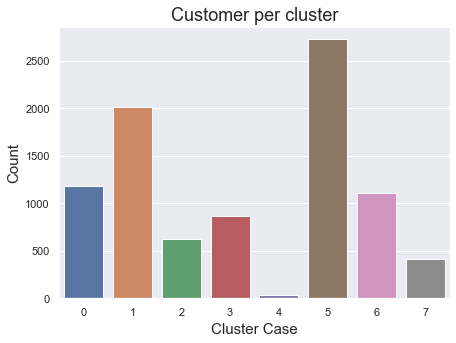

In [49]:
plt.figure(figsize=(7,5))
sns.countplot(df["cluster"])
plt.title('Customer per cluster',fontsize=18)
plt.xlabel("Cluster Case",fontsize=15)
plt.ylabel("Count",fontsize=15)


Text(0.5, 1.0, 'Customers Segmentation based on their Credit Card usage bhaviour.')

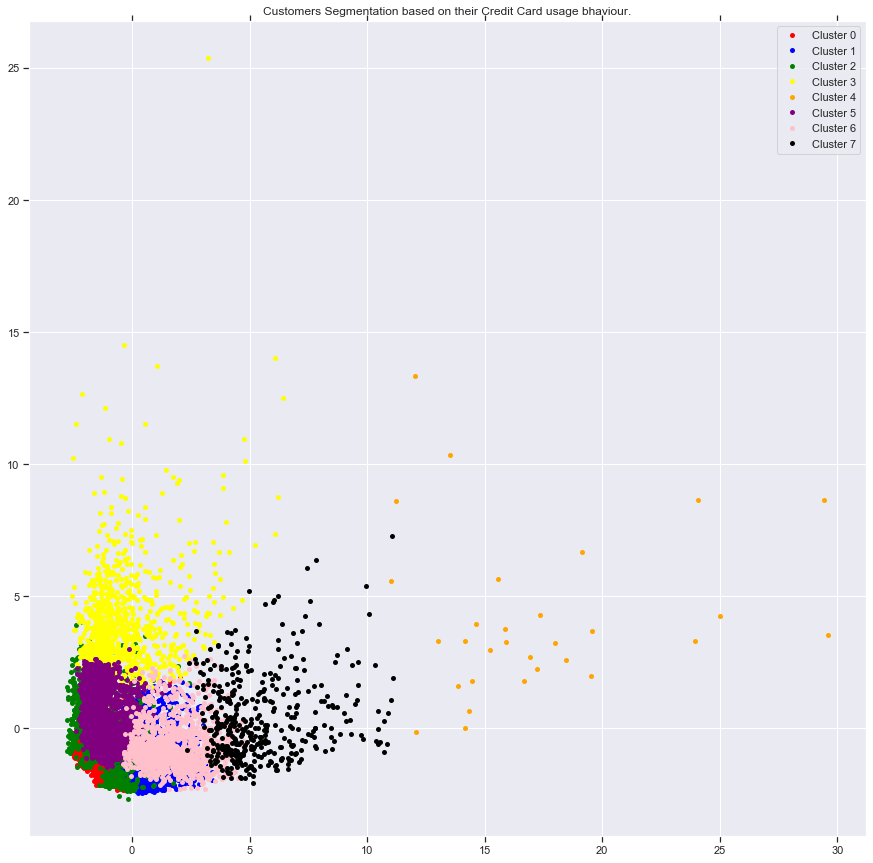

In [50]:
x, y = df_pca2 [:, 0], df_pca2 [:, 1]

colors = {0: 'red',
          1: 'blue',
          2: 'green', 
          3: 'yellow', 
          4: 'orange',  
          5: 'purple',
          6: 'pink',
          7: 'black'}

names = {0: 'Cluster 0', 
         1: 'Cluster 1', 
         2: 'Cluster 2', 
         3: 'Cluster 3', 
         4: 'Cluster 4',
         5: 'Cluster 5',
         6: 'Cluster 6',
         7: 'Cluster 7'}
  
df = pd.DataFrame({'x': x, 'y':y, 'label':df['cluster']}) 
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(15, 15)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Customers Segmentation based on their Credit Card usage bhaviour.")